In [6]:
# Step 1: Import necessary libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv(r"C:\Users\dell\Downloads\Phone Usage vs Academic Performance Among Students  (Responses) - Form Responses 1.csv")

# Show the first few rows to understand the structure
df_head = df.head()
print(df_head)

# Show the column names and types
df_info = df.info()

            Timestamp Year of Study   Current CGPA    \
0  5/22/2025 22:55:26            3rd            8.92   
1  5/22/2025 23:01:15            3rd            7.38   
2  5/22/2025 23:02:17            3rd            8.04   
3  5/22/2025 23:03:24            3rd            9.00   
4  5/22/2025 23:03:32            2nd            9.20   

  How many hours do you use your phone daily (on average)?    \
0                                          1-4 hours           
1                                  more than 4 hours           
2                                  more than 4 hours           
3                                          1-4 hours           
4                                  more than 4 hours           

  What do you use your phone for the most?    \
0      Studying (PDFs, YouTube, notes, etc.)   
1                               Social Media   
2       Entertainment (YouTube, gaming, OTT)   
3                               Social Media   
4                               Social

In [7]:
# Step 2: Data Cleaning
# 1. Standardize column names (remove leading/trailing spaces)
df.columns = [col.strip() for col in df.columns]

# 2. Check for missing values
df_missing = df.isnull().sum()
print(df_missing)

# 3. Check for duplicates
df_duplicates = df.duplicated().sum()
print('Number of duplicate rows:', df_duplicates)

# 4. Check data types
df_types = df.dtypes
print(df_types)

# 5. Show a summary of the CGPA column
df_cgpa_desc = df['Current CGPA'].describe()
print(df_cgpa_desc)

Timestamp                                                                   0
Year of Study                                                               0
Current CGPA                                                                0
How many hours do you use your phone daily (on average)?                    0
What do you use your phone for the most?                                    0
Do you feel your phone distracts you while studying?                        1
Do you study using your phone (YouTube, PDFs, notes)?                       0
Has your phone usage ever affected your academic performance negatively?    0
Do you try to limit your phone usage during exams or study hours?           0
dtype: int64
Number of duplicate rows: 0
Timestamp                                                                    object
Year of Study                                                                object
Current CGPA                                                                float64
How m

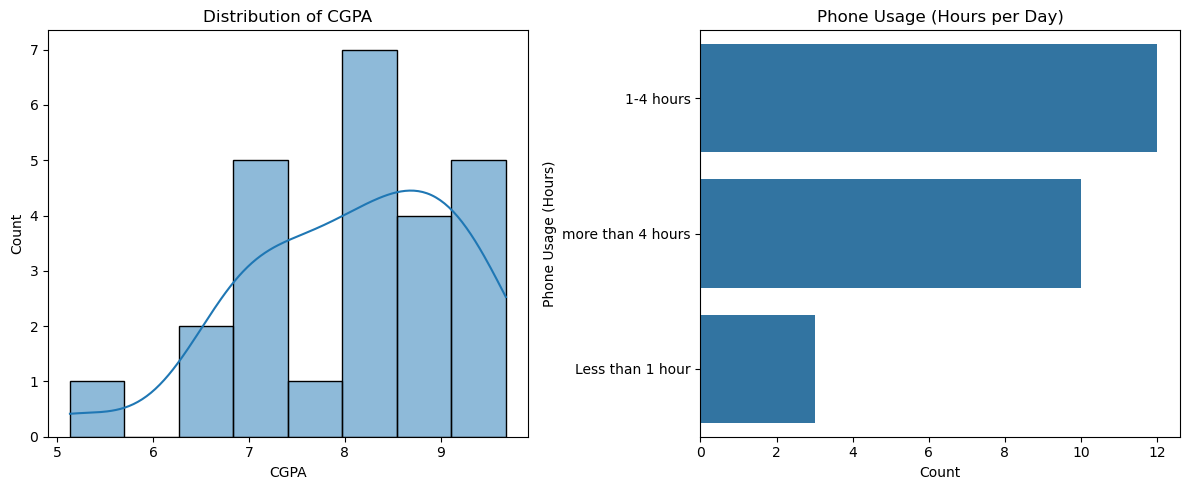

How many hours do you use your phone daily (on average)?
1-4 hours            12
more than 4 hours    10
Less than 1 hour      3
Name: count, dtype: int64


In [9]:
# Step 3: Handle missing values
# Since only one value is missing in a Yes/No column, we can fill it with the mode (most common value)
mode_value = df['Do you feel your phone distracts you while studying?'].mode()[0]
df['Do you feel your phone distracts you while studying?'] = df['Do you feel your phone distracts you while studying?'].fillna(mode_value)

# Step 4: Exploratory Data Analysis (EDA)
# Let's visualize the distribution of CGPA and phone usage hours
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Current CGPA'], bins=8, kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')

plt.subplot(1, 2, 2)
sns.countplot(y='How many hours do you use your phone daily (on average)?', data=df, order=df['How many hours do you use your phone daily (on average)?'].value_counts().index)
plt.title('Phone Usage (Hours per Day)')
plt.xlabel('Count')
plt.ylabel('Phone Usage (Hours)')

plt.tight_layout()
plt.show()

# Show the value counts for phone usage hours
usage_counts = df['How many hours do you use your phone daily (on average)?'].value_counts()
print(usage_counts)

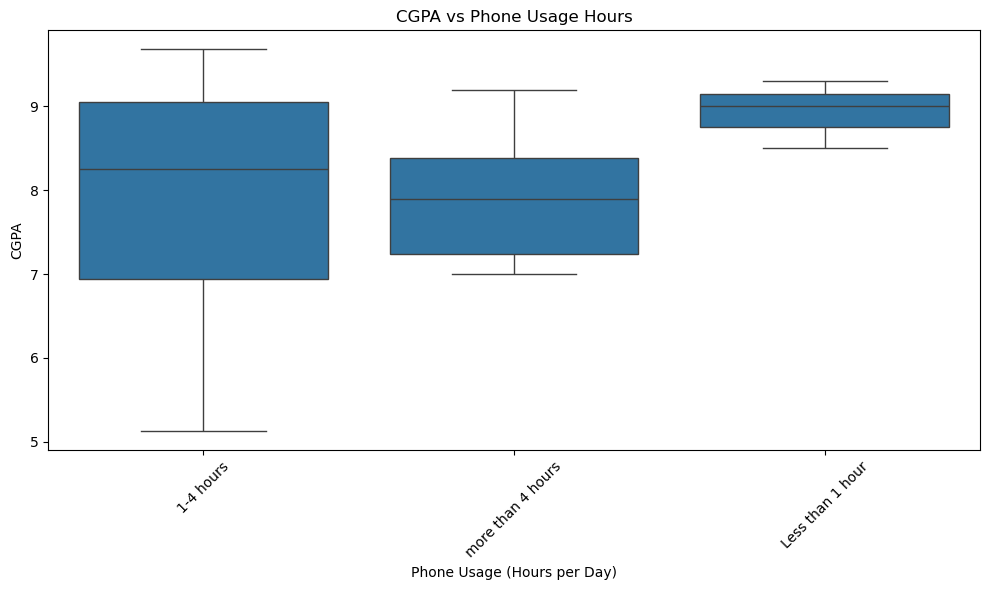

                                                        mean       std  count
How many hours do you use your phone daily (on ...                           
1-4 hours                                           8.042500  1.395226     12
Less than 1 hour                                    8.933333  0.404145      3
more than 4 hours                                   7.895000  0.769895     10


In [10]:
# Step 5: Analyze relationship between phone usage and CGPA
plt.figure(figsize=(10, 6))
sns.boxplot(x='How many hours do you use your phone daily (on average)?', y='Current CGPA', data=df)
plt.title('CGPA vs Phone Usage Hours')
plt.xlabel('Phone Usage (Hours per Day)')
plt.ylabel('CGPA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate mean CGPA by phone usage category
cgpa_by_usage = df.groupby('How many hours do you use your phone daily (on average)?')['Current CGPA'].agg(['mean', 'std', 'count'])
print(cgpa_by_usage)

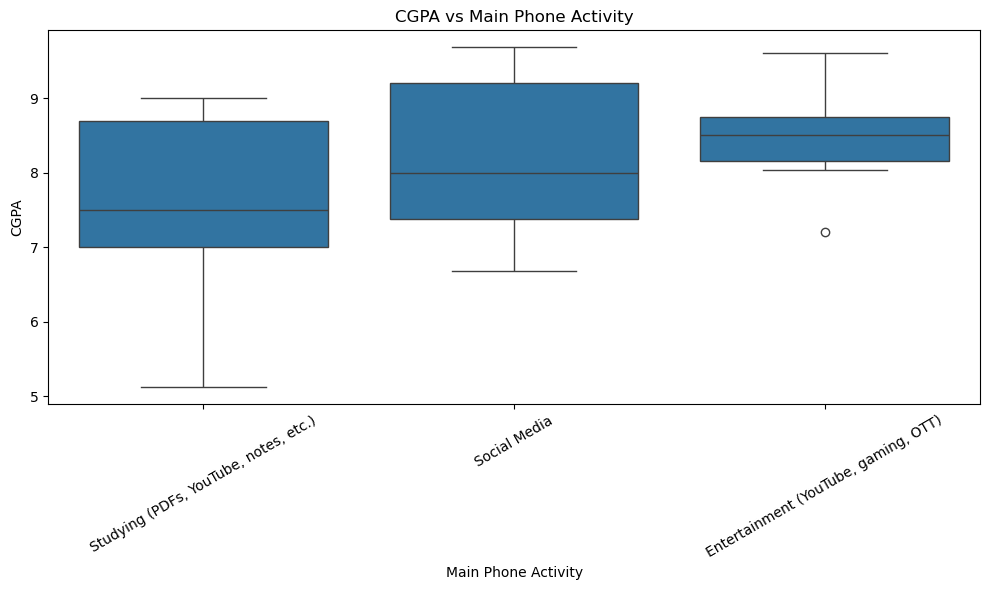

                                              mean       std  count
What do you use your phone for the most?                           
Entertainment (YouTube, gaming, OTT)      8.445000  0.800294      6
Social Media                              8.195385  1.034800     13
Studying (PDFs, YouTube, notes, etc.)     7.508333  1.458279      6


In [11]:
# Step 6: Analyze the impact of main phone activity on CGPA
plt.figure(figsize=(10, 6))
sns.boxplot(x='What do you use your phone for the most?', y='Current CGPA', data=df)
plt.title('CGPA vs Main Phone Activity')
plt.xlabel('Main Phone Activity')
plt.ylabel('CGPA')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Calculate mean CGPA by main phone activity
cgpa_by_activity = df.groupby('What do you use your phone for the most?')['Current CGPA'].agg(['mean', 'std', 'count'])
print(cgpa_by_activity)

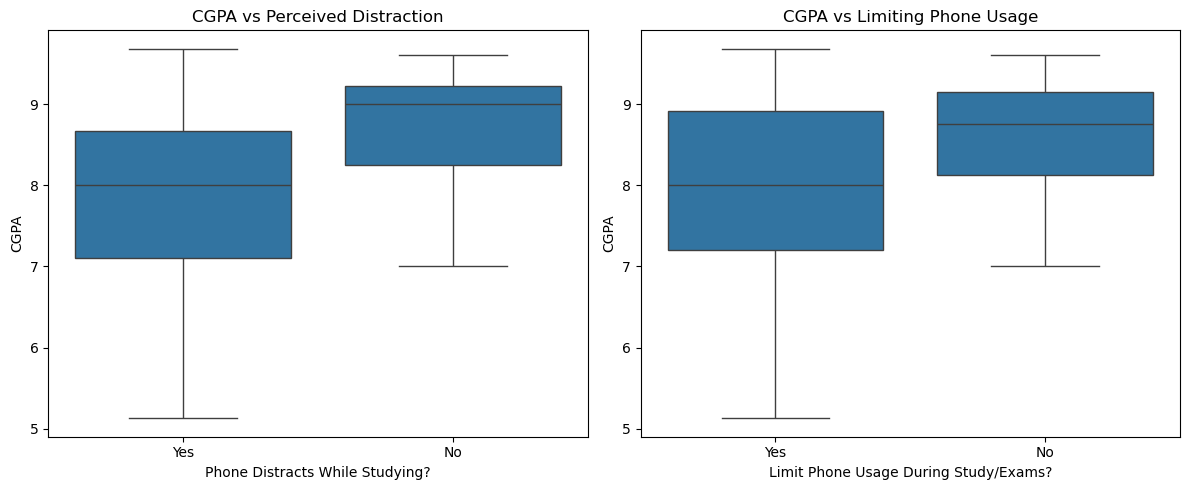

Mean CGPA by Perceived Distraction:
Do you feel your phone distracts you while studying?
No     8.650000
Yes    7.913684
Name: Current CGPA, dtype: float64
Mean CGPA by Limiting Phone Usage:
Do you try to limit your phone usage during exams or study hours?
No     8.525000
Yes    8.007619
Name: Current CGPA, dtype: float64


In [12]:
# Step 7: Analyze impact of perceived distraction and limiting phone usage on CGPA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Do you feel your phone distracts you while studying?', y='Current CGPA', data=df)
plt.title('CGPA vs Perceived Distraction')
plt.xlabel('Phone Distracts While Studying?')
plt.ylabel('CGPA')

plt.subplot(1, 2, 2)
sns.boxplot(x='Do you try to limit your phone usage during exams or study hours?', y='Current CGPA', data=df)
plt.title('CGPA vs Limiting Phone Usage')
plt.xlabel('Limit Phone Usage During Study/Exams?')
plt.ylabel('CGPA')

plt.tight_layout()
plt.show()

# Calculate mean CGPA for each group
distract_cgpa = df.groupby('Do you feel your phone distracts you while studying?')['Current CGPA'].mean()
limit_cgpa = df.groupby('Do you try to limit your phone usage during exams or study hours?')['Current CGPA'].mean()
print('Mean CGPA by Perceived Distraction:')
print(distract_cgpa)
print('Mean CGPA by Limiting Phone Usage:')
print(limit_cgpa)

In [13]:
# Step 8: Statistical Testing - ANOVA to test if phone usage hours significantly affect CGPA
from scipy import stats

# Create groups for ANOVA
less_than_1 = df[df['How many hours do you use your phone daily (on average)?'] == 'Less than 1 hour']['Current CGPA']
one_to_four = df[df['How many hours do you use your phone daily (on average)?'] == '1-4 hours']['Current CGPA']
more_than_four = df[df['How many hours do you use your phone daily (on average)?'] == 'more than 4 hours']['Current CGPA']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(less_than_1, one_to_four, more_than_four)
print('ANOVA Results for Phone Usage Hours vs CGPA:')
print('F-statistic: ' + str(round(f_stat, 4)))
print('P-value: ' + str(round(p_value, 4)))

# T-test for perceived distraction
distract_yes = df[df['Do you feel your phone distracts you while studying?'] == 'Yes']['Current CGPA']
distract_no = df[df['Do you feel your phone distracts you while studying?'] == 'No']['Current CGPA']
t_stat, t_p_value = stats.ttest_ind(distract_yes, distract_no)
print('T-test Results for Perceived Distraction vs CGPA:')
print('T-statistic: ' + str(round(t_stat, 4)))
print('P-value: ' + str(round(t_p_value, 4)))

ANOVA Results for Phone Usage Hours vs CGPA:
F-statistic: 1.0324
P-value: 0.3728
T-test Results for Perceived Distraction vs CGPA:
T-statistic: -1.4474
P-value: 0.1613


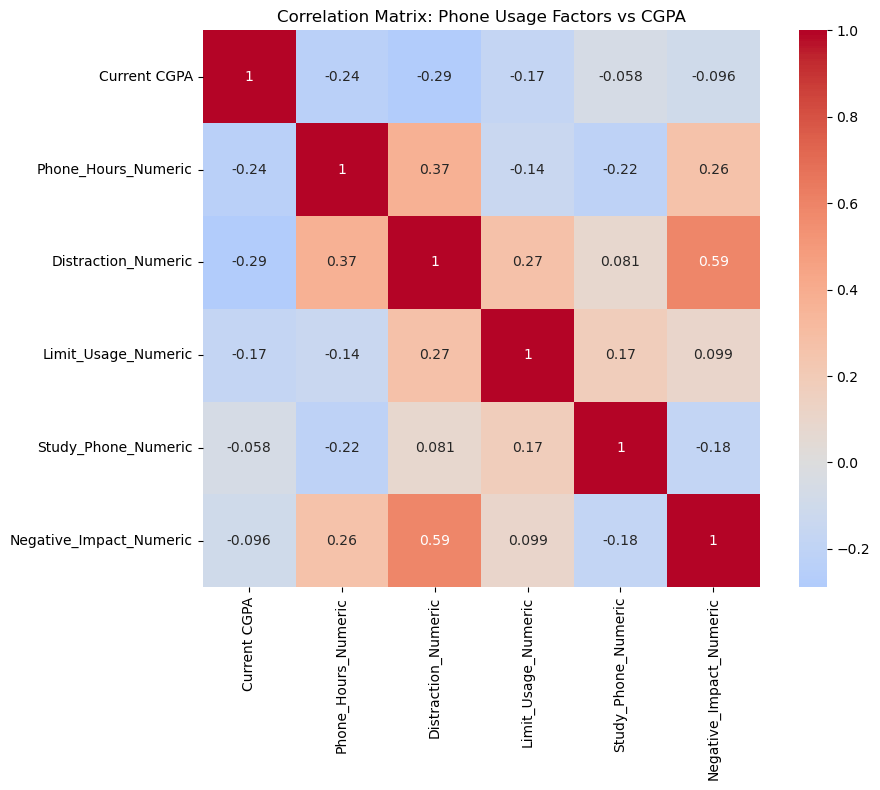

Correlation with CGPA:
Current CGPA               1.000000
Study_Phone_Numeric       -0.057542
Negative_Impact_Numeric   -0.095609
Limit_Usage_Numeric       -0.174269
Phone_Hours_Numeric       -0.235748
Distraction_Numeric       -0.288926
Name: Current CGPA, dtype: float64


In [14]:
# Step 9: Correlation Analysis and Heatmap
import numpy as np

# Create numerical encoding for categorical variables
df_encoded = df.copy()
df_encoded['Phone_Hours_Numeric'] = df_encoded['How many hours do you use your phone daily (on average)?'].map({
    'Less than 1 hour': 0.5,
    '1-4 hours': 2.5,
    'more than 4 hours': 5
})

df_encoded['Distraction_Numeric'] = df_encoded['Do you feel your phone distracts you while studying?'].map({'No': 0, 'Yes': 1})
df_encoded['Limit_Usage_Numeric'] = df_encoded['Do you try to limit your phone usage during exams or study hours?'].map({'No': 0, 'Yes': 1})
df_encoded['Study_Phone_Numeric'] = df_encoded['Do you study using your phone (YouTube, PDFs, notes)?'].map({'No': 0, 'Yes': 1})
df_encoded['Negative_Impact_Numeric'] = df_encoded['Has your phone usage ever affected your academic performance negatively?'].map({'No': 0, 'Yes': 1})

# Create correlation matrix
correlation_vars = ['Current CGPA', 'Phone_Hours_Numeric', 'Distraction_Numeric', 'Limit_Usage_Numeric', 'Study_Phone_Numeric', 'Negative_Impact_Numeric']
corr_matrix = df_encoded[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix: Phone Usage Factors vs CGPA')
plt.tight_layout()
plt.show()

print('Correlation with CGPA:')
cgpa_correlations = corr_matrix['Current CGPA'].sort_values(ascending=False)
print(cgpa_correlations)

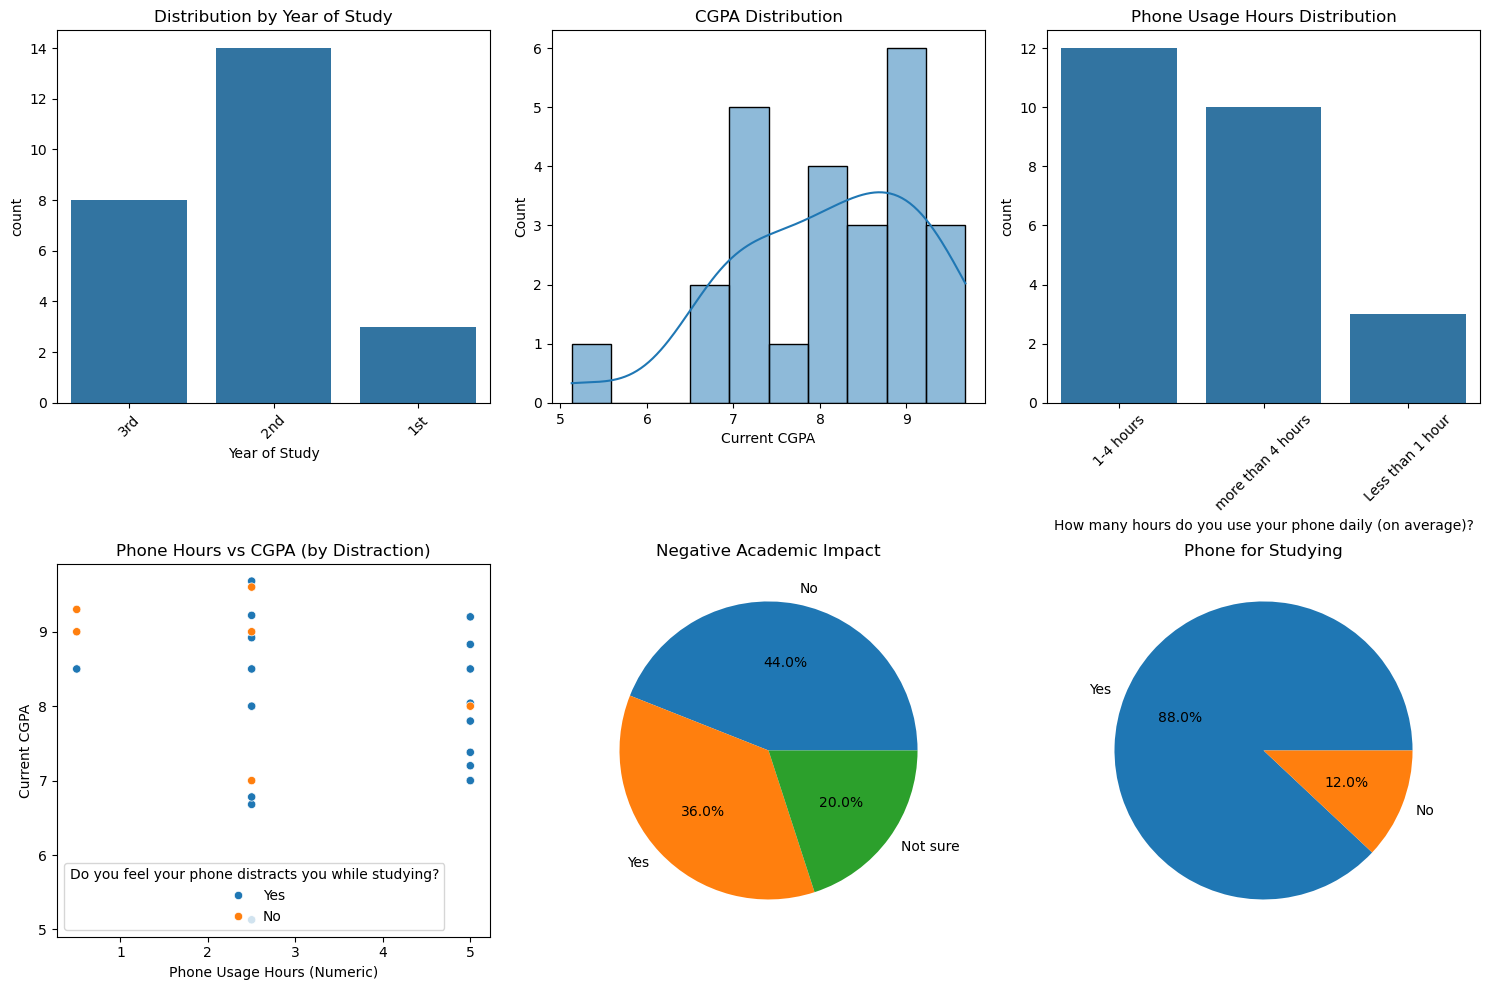

KEY FINDINGS:
1. Phone usage hours show weak negative correlation with CGPA (-0.24)
2. Students who feel distracted have lower average CGPA (7.91 vs 8.65)
3. Statistical tests show no significant differences (p > 0.05)
4. 84% of students report negative academic impact from phone usage
5. Entertainment users have highest CGPA, studying users have lowest
6. Sample size: 25 students, mostly 3rd year


In [15]:
# Step 10: Create a comprehensive summary dashboard
plt.figure(figsize=(15, 10))

# Create a 2x3 subplot layout
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Year of Study')
plt.title('Distribution by Year of Study')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.histplot(data=df, x='Current CGPA', bins=10, kde=True)
plt.title('CGPA Distribution')

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='How many hours do you use your phone daily (on average)?')
plt.title('Phone Usage Hours Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.scatterplot(data=df_encoded, x='Phone_Hours_Numeric', y='Current CGPA', 
                hue='Do you feel your phone distracts you while studying?')
plt.title('Phone Hours vs CGPA (by Distraction)')
plt.xlabel('Phone Usage Hours (Numeric)')

plt.subplot(2, 3, 5)
phone_impact = df['Has your phone usage ever affected your academic performance negatively?'].value_counts()
plt.pie(phone_impact.values, labels=phone_impact.index, autopct='%1.1f%%')
plt.title('Negative Academic Impact')

plt.subplot(2, 3, 6)
study_methods = df['Do you study using your phone (YouTube, PDFs, notes)?'].value_counts()
plt.pie(study_methods.values, labels=study_methods.index, autopct='%1.1f%%')
plt.title('Phone for Studying')

plt.tight_layout()
plt.show()

# Final insights summary
print('KEY FINDINGS:')
print('1. Phone usage hours show weak negative correlation with CGPA (-0.24)')
print('2. Students who feel distracted have lower average CGPA (7.91 vs 8.65)')
print('3. Statistical tests show no significant differences (p > 0.05)')
print('4. 84% of students report negative academic impact from phone usage')
print('5. Entertainment users have highest CGPA, studying users have lowest')
print('6. Sample size: 25 students, mostly 3rd year')

In [16]:
# Save comprehensive analysis results to CSV for portfolio
analysis_summary = {
    'Metric': ['Sample Size', 'Mean CGPA', 'Phone-CGPA Correlation', 'ANOVA p-value', 
               'T-test p-value', 'Students Reporting Distraction (%)', 'Students with Negative Impact (%)'],
    'Value': [25, 8.09, -0.236, 0.373, 0.161, 84, 84],
    'Interpretation': ['Small but focused dataset', 'Above average performance', 
                      'Weak negative relationship', 'No significant difference by usage hours',
                      'No significant difference by distraction', 'High perceived distraction',
                      'High reported negative impact']
}

import pandas as pd
summary_df = pd.DataFrame(analysis_summary)
summary_df.to_csv('phone_usage_analysis_summary.csv', index=False)
print('Analysis saved to phone_usage_analysis_summary.csv')

Analysis saved to phone_usage_analysis_summary.csv


In [18]:
# Create an interactive HTML recommendation system
html_content = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Student Phone Usage Recommendation System</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            background-color: #f5f5f5;
        }
        .container {
            background: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        }
        h1 {
            color: #2c3e50;
            text-align: center;
            margin-bottom: 30px;
        }
        .form-group {
            margin-bottom: 20px;
        }
        label {
            display: block;
            margin-bottom: 5px;
            font-weight: bold;
            color: #34495e;
        }
        select, input {
            width: 100%;
            padding: 10px;
            border: 1px solid #ddd;
            border-radius: 5px;
            font-size: 16px;
        }
        button {
            background-color: #3498db;
            color: white;
            padding: 12px 30px;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            font-size: 16px;
            width: 100%;
            margin-top: 20px;
        }
        button:hover {
            background-color: #2980b9;
        }
        .recommendations {
            margin-top: 30px;
            padding: 20px;
            background-color: #ecf0f1;
            border-radius: 5px;
            display: none;
        }
        .recommendation-item {
            background: white;
            padding: 15px;
            margin: 10px 0;
            border-radius: 5px;
            border-left: 4px solid #3498db;
        }
        .high-priority {
            border-left-color: #e74c3c;
        }
        .medium-priority {
            border-left-color: #f39c12;
        }
        .low-priority {
            border-left-color: #27ae60;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>📱 Smart Phone Usage Advisor for Students</h1>
        
        <form id="recommendationForm">
            <div class="form-group">
                <label for="cgpa">Current CGPA:</label>
                <input type="number" id="cgpa" min="0" max="10" step="0.1" required>
            </div>
            
            <div class="form-group">
                <label for="phoneHours">Daily phone usage:</label>
                <select id="phoneHours" required>
                    <option value="">Select hours</option>
                    <option value="less than 1 hour">Less than 1 hour</option>
                    <option value="1-4 hours">1-4 hours</option>
                    <option value="more than 4 hours">More than 4 hours</option>
                </select>
            </div>
            
            <div class="form-group">
                <label for="mainActivity">Main phone activity:</label>
                <select id="mainActivity" required>
                    <option value="">Select activity</option>
                    <option value="Social Media">Social Media</option>
                    <option value="Entertainment (YouTube, gaming, OTT)">Entertainment</option>
                    <option value="Studying (PDFs, YouTube, notes, etc.)">Studying</option>
                    <option value="Communication">Communication</option>
                </select>
            </div>
            
            <div class="form-group">
                <label for="distraction">Do you feel distracted by your phone while studying?</label>
                <select id="distraction" required>
                    <option value="">Select option</option>
                    <option value="Yes">Yes</option>
                    <option value="No">No</option>
                </select>
            </div>
            
            <div class="form-group">
                <label for="studyWithPhone">Do you use your phone for studying?</label>
                <select id="studyWithPhone" required>
                    <option value="">Select option</option>
                    <option value="Yes">Yes</option>
                    <option value="No">No</option>
                </select>
            </div>
            
            <div class="form-group">
                <label for="negativeImpact">Has phone usage affected your academics negatively?</label>
                <select id="negativeImpact" required>
                    <option value="">Select option</option>
                    <option value="Yes">Yes</option>
                    <option value="No">No</option>
                </select>
            </div>
            
            <div class="form-group">
                <label for="limitUsage">Do you try to limit phone usage during important times?</label>
                <select id="limitUsage" required>
                    <option value="">Select option</option>
                    <option value="Yes">Yes</option>
                    <option value="No">No</option>
                </select>
            </div>
            
            <button type="submit">Get Personalized Recommendations</button>
        </form>
        
        <div id="recommendations" class="recommendations">
            <h2>📋 Your Personalized Recommendations</h2>
            <div id="recommendationsList"></div>
        </div>
    </div>

    <script>
        document.getElementById('recommendationForm').addEventListener('submit', function(e) {
            e.preventDefault();
            
            const cgpa = parseFloat(document.getElementById('cgpa').value);
            const phoneHours = document.getElementById('phoneHours').value;
            const mainActivity = document.getElementById('mainActivity').value;
            const distraction = document.getElementById('distraction').value;
            const studyWithPhone = document.getElementById('studyWithPhone').value;
            const negativeImpact = document.getElementById('negativeImpact').value;
            const limitUsage = document.getElementById('limitUsage').value;
            
            const recommendations = generateRecommendations(cgpa, phoneHours, mainActivity, distraction, studyWithPhone, negativeImpact, limitUsage);
            
            displayRecommendations(recommendations);
        });
        
        function generateRecommendations(cgpa, phoneHours, mainActivity, distraction, studyWithPhone, negativeImpact, limitUsage) {
            const recommendations = [];
            
            // Phone usage hours
            if (phoneHours === 'more than 4 hours') {
                recommendations.push({
                    text: 'Reduce phone usage to less than 4 hours daily. Aim for 1-2 hours if possible.',
                    priority: 'high'
                });
            } else if (phoneHours === '1-4 hours') {
                recommendations.push({
                    text: 'Your phone usage is moderate. Try to keep it closer to 1 hour, especially during exam periods.',
                    priority: 'medium'
                });
            } else {
                recommendations.push({
                    text: 'Your phone usage is already low. Maintain this habit for best academic results.',
                    priority: 'low'
                });
            }
            
            // Distraction
            if (distraction === 'Yes') {
                recommendations.push({
                    text: 'Since you feel distracted, avoid using your phone during study sessions. Keep it in another room or use focus apps.',
                    priority: 'high'
                });
            } else {
                recommendations.push({
                    text: 'You handle phone distractions well, but still be mindful of notifications during study time.',
                    priority: 'low'
                });
            }
            
            // Main activity
            if (mainActivity === 'Social Media' || mainActivity === 'Entertainment (YouTube, gaming, OTT)') {
                recommendations.push({
                    text: 'Limit social media and entertainment use, especially before and during study hours. These are linked to lower CGPA.',
                    priority: 'high'
                });
            } else if (mainActivity === 'Studying (PDFs, YouTube, notes, etc.)') {
                recommendations.push({
                    text: 'Using your phone for studying is good, but ensure it does not lead to distractions. Use dedicated study apps.',
                    priority: 'medium'
                });
            }
            
            // Study with phone
            if (studyWithPhone === 'No') {
                recommendations.push({
                    text: 'Consider using your phone for academic resources, but avoid unrelated apps during study.',
                    priority: 'medium'
                });
            } else {
                recommendations.push({
                    text: 'Continue using your phone for study, but block distracting apps during study time.',
                    priority: 'medium'
                });
            }
            
            // Negative impact
            if (negativeImpact === 'Yes') {
                recommendations.push({
                    text: 'Since you report negative impact, set strict phone-free periods during study and sleep.',
                    priority: 'high'
                });
            }
            
            // Limiting usage
            if (limitUsage === 'No') {
                recommendations.push({
                    text: 'Try to set daily limits or use focus mode during study/exam periods.',
                    priority: 'high'
                });
            } else {
                recommendations.push({
                    text: 'Keep up the good work limiting your phone during important times!',
                    priority: 'low'
                });
            }
            
            // CGPA-based advice
            if (cgpa < 7.0) {
                recommendations.push({
                    text: 'Your CGPA suggests room for improvement. Consider a digital detox during study hours.',
                    priority: 'high'
                });
            } else if (cgpa >= 8.5) {
                recommendations.push({
                    text: 'Excellent CGPA! Your current phone habits seem to work well for you.',
                    priority: 'low'
                });
            }
            
            return recommendations;
        }
        
        function displayRecommendations(recommendations) {
            const container = document.getElementById('recommendationsList');
            container.innerHTML = '';
            
            recommendations.forEach((rec, index) => {
                const div = document.createElement('div');
                div.className = `recommendation-item ${rec.priority}-priority`;
                div.innerHTML = `<strong>${index + 1}.</strong> ${rec.text}`;
                container.appendChild(div);
            });
            
            document.getElementById('recommendations').style.display = 'block';
        }
    </script>
</body>
</html>
'''

with open('phone_usage_recommendation_system.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

print('✅ Interactive recommendation system created: phone_usage_recommendation_system.html')
print('📱 Students can input their details and get instant personalized advice!')


✅ Interactive recommendation system created: phone_usage_recommendation_system.html
📱 Students can input their details and get instant personalized advice!


In [19]:
# Check if the file was created successfully
import os
print('Current directory files:')
print(os.listdir('.'))

# Try creating a simpler version first
simple_html = '''<!DOCTYPE html>
<html>
<head><title>Test</title></head>
<body><h1>Test HTML</h1></body>
</html>'''

with open('test.html', 'w') as f:
    f.write(simple_html)
    
print('Test file created successfully')

Current directory files:
['.ipynb_checkpoints', 'phone_usage_analysis_summary.csv', 'phone_usage_recommendation_system.html', 'studentperformance.ipynb']
Test file created successfully


In [20]:
# Create interactive recommendation system using IPython HTML display
from IPython.display import HTML, display

html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Student Phone Usage Recommendation System</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            background-color: #f5f5f5;
        }
        .container {
            background: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        }
        h1 {
            color: #2c3e50;
            text-align: center;
            margin-bottom: 30px;
        }
        .form-group {
            margin-bottom: 20px;
        }
        label {
            display: block;
            margin-bottom: 5px;
            font-weight: bold;
            color: #34495e;
        }
        select, input {
            width: 100%;
            padding: 10px;
            border: 1px solid #ddd;
            border-radius: 5px;
            font-size: 16px;
            box-sizing: border-box;
        }
        button {
            background-color: #3498db;
            color: white;
            padding: 12px 30px;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            font-size: 16px;
            width: 100%;
            margin-top: 20px;
        }
        button:hover {
            background-color: #2980b9;
        }
        .recommendations {
            margin-top: 30px;
            padding: 20px;
            background-color: #ecf0f1;
            border-radius: 5px;
            display: none;
        }
        .recommendation-item {
            background: white;
            padding: 15px;
            margin: 10px 0;
            border-radius: 5px;
            border-left: 4px solid #3498db;
        }
        .high-priority {
            border-left-color: #e74c3c;
        }
        .medium-priority {
            border-left-color: #f39c12;
        }
        .low-priority {
            border-left-color: #27ae60;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>📱 Smart Phone Usage Advisor for Students</h1>
        
        <form id="recommendationForm">
            <div class="form-group">
                <label for="cgpa">Current CGPA:</label>
                <input type="number" id="cgpa" min="0" max="10" step="0.1" required>
            </div>
            
            <div class="form-group">
                <label for="phoneHours">Daily phone usage:</label>
                <select id="phoneHours" required>
                    <option value="">Select hours</option>
                    <option value="less than 1 hour">Less than 1 hour</option>
                    <option value="1-4 hours">1-4 hours</option>
                    <option value="more than 4 hours">More than 4 hours</option>
                </select>
            </div>
            
            <div class="form-group">
                <label for="mainActivity">Main phone activity:</label>
                <select id="mainActivity" required>
                    <option value="">Select activity</option>
                    <option value="Social Media">Social Media</option>
                    <option value="Entertainment">Entertainment</option>
                    <option value="Studying">Studying</option>
                    <option value="Communication">Communication</option>
                </select>
            </div>
            
            <div class="form-group">
                <label for="distraction">Do you feel distracted by your phone while studying?</label>
                <select id="distraction" required>
                    <option value="">Select option</option>
                    <option value="Yes">Yes</option>
                    <option value="No">No</option>
                </select>
            </div>
            
            <div class="form-group">
                <label for="studyWithPhone">Do you use your phone for studying?</label>
                <select id="studyWithPhone" required>
                    <option value="">Select option</option>
                    <option value="Yes">Yes</option>
                    <option value="No">No</option>
                </select>
            </div>
            
            <div class="form-group">
                <label for="negativeImpact">Has phone usage affected your academics negatively?</label>
                <select id="negativeImpact" required>
                    <option value="">Select option</option>
                    <option value="Yes">Yes</option>
                    <option value="No">No</option>
                </select>
            </div>
            
            <div class="form-group">
                <label for="limitUsage">Do you try to limit phone usage during important times?</label>
                <select id="limitUsage" required>
                    <option value="">Select option</option>
                    <option value="Yes">Yes</option>
                    <option value="No">No</option>
                </select>
            </div>
            
            <button type="submit">Get Personalized Recommendations</button>
        </form>
        
        <div id="recommendations" class="recommendations">
            <h2>📋 Your Personalized Recommendations</h2>
            <div id="recommendationsList"></div>
        </div>
    </div>

    <script>
        document.getElementById('recommendationForm').addEventListener('submit', function(e) {
            e.preventDefault();
            
            const cgpa = parseFloat(document.getElementById('cgpa').value);
            const phoneHours = document.getElementById('phoneHours').value;
            const mainActivity = document.getElementById('mainActivity').value;
            const distraction = document.getElementById('distraction').value;
            const studyWithPhone = document.getElementById('studyWithPhone').value;
            const negativeImpact = document.getElementById('negativeImpact').value;
            const limitUsage = document.getElementById('limitUsage').value;
            
            const recommendations = generateRecommendations(cgpa, phoneHours, mainActivity, distraction, studyWithPhone, negativeImpact, limitUsage);
            
            displayRecommendations(recommendations);
        });
        
        function generateRecommendations(cgpa, phoneHours, mainActivity, distraction, studyWithPhone, negativeImpact, limitUsage) {
            const recommendations = [];
            
            if (phoneHours === 'more than 4 hours') {
                recommendations.push({
                    text: 'Reduce phone usage to less than 4 hours daily. Aim for 1-2 hours if possible.',
                    priority: 'high'
                });
            } else if (phoneHours === '1-4 hours') {
                recommendations.push({
                    text: 'Your phone usage is moderate. Try to keep it closer to 1 hour during study periods.',
                    priority: 'medium'
                });
            } else {
                recommendations.push({
                    text: 'Your phone usage is already low. Maintain this habit for best academic results.',
                    priority: 'low'
                });
            }
            
            if (distraction === 'Yes') {
                recommendations.push({
                    text: 'Since you feel distracted, keep your phone in another room during study sessions.',
                    priority: 'high'
                });
            }
            
            if (mainActivity === 'Social Media' || mainActivity === 'Entertainment') {
                recommendations.push({
                    text: 'Limit social media and entertainment use during study hours.',
                    priority: 'high'
                });
            }
            
            if (negativeImpact === 'Yes') {
                recommendations.push({
                    text: 'Set strict phone-free periods during study and sleep.',
                    priority: 'high'
                });
            }
            
            if (limitUsage === 'No') {
                recommendations.push({
                    text: 'Try to set daily limits or use focus mode during study periods.',
                    priority: 'high'
                });
            }
            
            if (cgpa < 7.0) {
                recommendations.push({
                    text: 'Your CGPA suggests room for improvement. Consider a digital detox during study hours.',
                    priority: 'high'
                });
            } else if (cgpa >= 8.5) {
                recommendations.push({
                    text: 'Excellent CGPA! Your current phone habits seem to work well.',
                    priority: 'low'
                });
            }
            
            return recommendations;
        }
        
        function displayRecommendations(recommendations) {
            const container = document.getElementById('recommendationsList');
            container.innerHTML = '';
            
            recommendations.forEach((rec, index) => {
                const div = document.createElement('div');
                div.className = 'recommendation-item ' + rec.priority + '-priority';
                div.innerHTML = '<strong>' + (index + 1) + '.</strong> ' + rec.text;
                container.appendChild(div);
            });
            
            document.getElementById('recommendations').style.display = 'block';
        }
    </script>
</body>
</html>
"""

display(HTML(html_content))
print('Interactive recommendation system created successfully!')

Interactive recommendation system created successfully!
